In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from math import exp

# Tables
### t1_user_active_min.csv
This table contains active minutes data logged after experiment started.
Each row represents the total number of minutes spent on site for each user on a date.
If a user never visited the site for a given date, there wouldn't be data for that uid on that date.
- uid: user ID
- dt: date when corresponding active minutes are registered
- active_mins: number of minutes spent on site for the date

In [2]:
t1 = pd.read_csv("t1_user_active_min.csv")
# convert date column to datetime type
t1['dt'] =  pd.to_datetime(t1['dt'], format='%Y-%m-%d')
t1.head()

,uid,dt,active_mins
0,0,2019-02-22,5.0
1,0,2019-03-11,5.0
2,0,2019-03-18,3.0
3,0,2019-03-22,4.0
4,0,2019-04-03,9.0


### t2_user_variant.csv
This table contains users’ treatment assignment.
Each row represents the assignment information for a unique user.
- uid: user ID
- variant_number: the experiment variant user is in. 0 for control, 1 for treatment
- dt: date when user entered the experiment, should be ‘2019-02-06’ for all users
- signup_date: the date string that user signed up on

In [3]:
t2 = pd.read_csv("t2_user_variant.csv")
# convert date column to datetime type
t2['dt'] =  pd.to_datetime(t2['dt'], format='%Y-%m-%d')
t2['signup_date'] =  pd.to_datetime(t2['signup_date'], format='%Y-%m-%d')
t2.head()

,uid,variant_number,dt,signup_date
0,0,0,2019-02-06,2018-09-24
1,1,0,2019-02-06,2016-11-07
2,2,0,2019-02-06,2018-09-17
3,3,0,2019-02-06,2018-03-04
4,4,0,2019-02-06,2017-03-09


### t3_user_active_min_pre.csv
This table contains active minutes data before the experiment started.
It has a similar format as t1, except the dt range can extend before the experiment start date.
- uid: user ID
- dt: date when corresponding active minutes are registered
- active_mins: number of minutes spent on site for the date

In [4]:
t3 = pd.read_csv("t3_user_active_min_pre.csv")
# convert date column to datetime type
t3['dt'] =  pd.to_datetime(t3['dt'], format='%Y-%m-%d')
t3.head()

,uid,dt,active_mins
0,0,2018-09-24,3.0
1,0,2018-11-08,4.0
2,0,2018-11-24,3.0
3,0,2018-11-28,6.0
4,0,2018-12-02,6.0


### t4_user_attributes.csv
This table contains data about some user attributes.
Each row represents attributes of a unique user.
- uid: user ID
- user_type: segment that a user belongs to, measured by activity level of the user. Can be ‘new_user’, ‘non_reader’, ‘reader’ or ‘contributor’
- gender: user gender. Can be ‘male’, ‘female’ or ‘unknown’

In [5]:
t4 = pd.read_csv("t4_user_attributes.csv")
t4.head()

,uid,gender,user_type
0,0,male,non_reader
1,1,male,reader
2,2,male,non_reader
3,3,male,non_reader
4,4,male,non_reader


## Problem 1
1.In order to measure the experiment effect on user engagement, let's say you want to perform a t-test of the difference in minutes spent on site, what would be your unit of analysis (i.e. when conducting a t-test, we calculate means and variances of two samples. What does each data point represent in the samples?)? <br>
**A.** Minutes per user in each group (number of data points in each group = number of users in that group) <br>
**B.** Minutes per user per day in each group (number of data points in each group = number of users in that group x number of days of the experiment) <br>
**C.** Minutes per group per day (number of data points in each group = number of days of the experiment) <br>

*Why do you think the other choices are not correct? Hint: think of the key assumptions of running a t-test.*

### Answer
**C**
<p>The key assumption of t test is that the testing population should be normal. The only normal distributed metric here is the minutes per group per day. Because the active time of user A is independent to that of user B, aggregating by day taking mean of active time will be a normal distribution according to central limit theorem. </p>
<p>The distribution of B is not normal for sure. Because most of the time people won't login, so the distribution will be highly skwed to left, similar to exponential distribution. </p>
<p>For A, active time for a single user will not be independent across day. Therefore, taking the mean of active time aggregating by user will not normal distributed.</p>

## Problem 2
Use only tables 1 (t1_user_active_min.csv) and 2 (t2_user_variant.csv) for this question. 
<p> We suspect that there might be inaccuracies in the minutes spent on site data in some rows. Think about the definition of the metric and check if there are any outliers in the data. In this context, outliers mean numbers that are obviously different due to logging errors. If so, remove them; if not, use all the data. </p>

<p>Using t-test under your assumption about variance, find an appropriate 95% confidence interval of the overall average treatment effect (i.e. difference in TOTAL active minutes between test and control, during the entire duration of the experiment).</p>

<p>Enter the confidence interval below. Please round your answer to second place after the decimal.
Based on your findings, what is your recommended course of action regarding the new UI design? You can justify your
choice in the next box. </p>

<p>Justify your answer.</p>

In [6]:
t_control = t2[t2.variant_number==0]
t_test = t2[t2.variant_number==1]
t_control = t_control.merge(t1,on='uid')
t_test = t_test.merge(t1,on='uid')

In [7]:
t2[t2.variant_number==0].shape

(40000, 4)

In [8]:
t2[t2.variant_number==1].shape

(10000, 4)

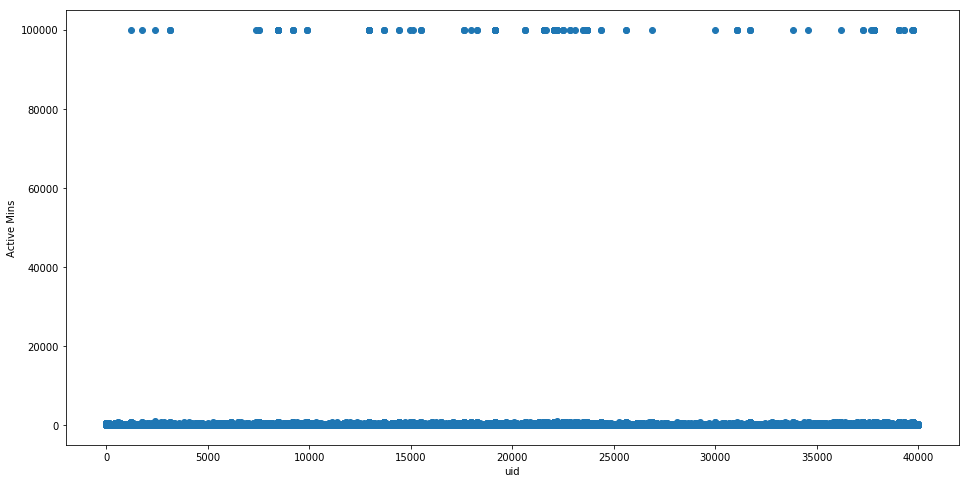

In [9]:
# Control Group
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(t_control['uid'], t_control['active_mins'])
ax.set_xlabel('uid')
ax.set_ylabel('Active Mins')
plt.show()
# There are several outliers for sure so we should remove them

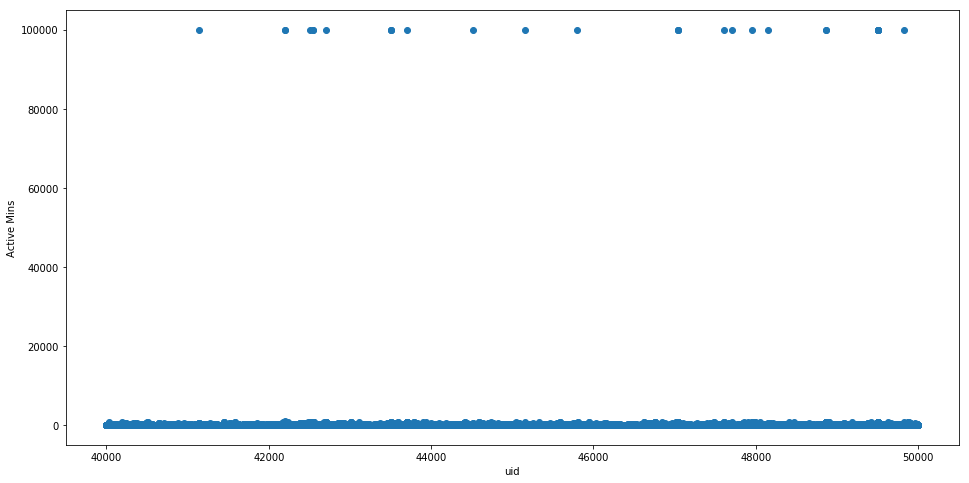

In [10]:
# Test Group
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(t_test['uid'], t_test['active_mins'])
ax.set_xlabel('uid')
ax.set_ylabel('Active Mins')
plt.show()
# There are several outliers for sure so we should remove them

In [11]:
# Remove the outliers by fixed number because of clear outliers
t_control_clean = t_control[t_control['active_mins'] <= 50000]

In [12]:
t_test_clean = t_test[t_test['active_mins'] <= 50000]

In [13]:
t_test_clean.shape

(179415, 6)

In [14]:
t_control_clean.shape

(886815, 6)

In [15]:
t_control_clean.columns = ["uid","variant_number",'experiment_dt',"signup_date","dt","active_mins"]
t_test_clean.columns = ["uid","variant_number",'experiment_dt',"signup_date","dt","active_mins"]

In [16]:
control_per_day = t_control_clean.groupby("dt").active_mins.mean().reset_index()
test_per_day = t_test_clean.groupby("dt").active_mins.mean().reset_index()
test_per_day.head()

,dt,active_mins
0,2019-02-06,28.474670
1,2019-02-07,27.436468
2,2019-02-08,27.181484
3,2019-02-09,26.838880
4,2019-02-10,27.444191


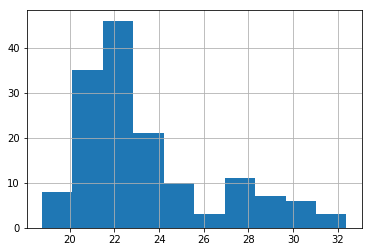

In [17]:
test_per_day.active_mins.hist()

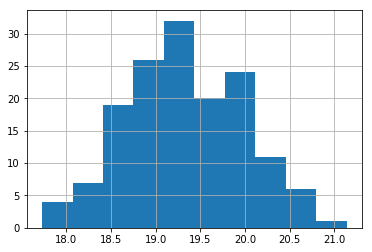

In [18]:
control_per_day.active_mins.hist()

In [19]:
x1 = control_per_day.active_mins.mean()
s1 = control_per_day.active_mins.std()
N1 = control_per_day.shape[0]

x2 = test_per_day.active_mins.mean()
s2 = test_per_day.active_mins.std()
N2 = test_per_day.shape[0]

v = N1+N2 - 2

s_pool = sqrt(((N1-1)*s1**2 + (N2-1)*s2**2)/v)

#since v is large enough
t_q = 1.96

# Variance between two groups will not be the same because of testing feature
lower = round(x2 - x1 - t_q*sqrt(s1**2/N1 + s2**2/N2),2)
upper = round(x2 - x1 + t_q*sqrt(s1**2/N1 + s2**2/N2),2)
print("[" + str(lower) + ", "+str(upper)+"]")

[3.59, 4.59]


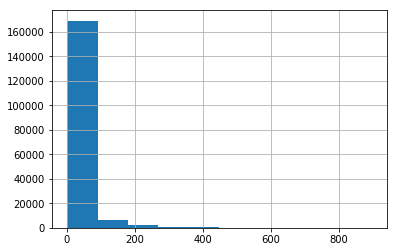

In [73]:
# Test Group
t_test_clean.active_mins.hist()

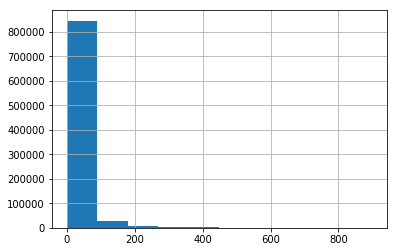

In [74]:
t_control_clean.active_mins.hist()

## Problem 3
<p>3.You decide to dive deeper into the data, so you gather a table of active minutes by user from before the experiment
began. You should now use table 3 (t3_user_active_min_pre.csv) along with tables 1 and 2 for this question.</p>
<p>Using the statistical method of your choice and the pre-experiment data, update your 95% confidence interval of the
overall average treatment effect (difference in TOTAL active minutes).</p>
<p>Please enter your confidence interval below, after rounding your answer to second place after the decimal.  
How does the pre-experiment data change your conclusion about the treatment effect of the experiment?  
What method do you use to compute your updated treatment effect?  </p>

In [20]:
# Separate two groups
control_pre = t3[t3.uid.isin(t_control_clean.uid)]
test_pre = t3[t3.uid.isin(t_test_clean.uid)]


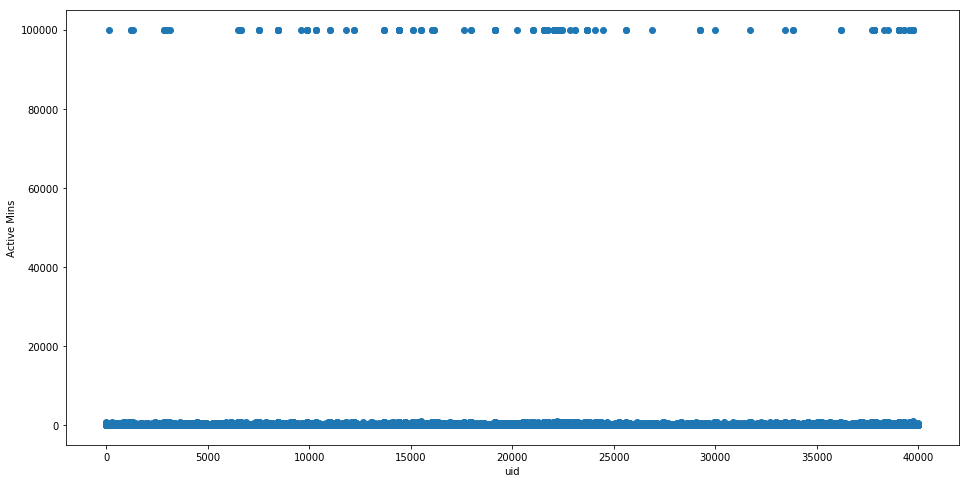

In [21]:
# Remove outliers
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(control_pre['uid'], control_pre['active_mins'])
ax.set_xlabel('uid')
ax.set_ylabel('Active Mins')
plt.show()

In [22]:
# Remove the logging error
control_pre_clean = control_pre[control_pre['active_mins'] <=50000]

test_pre_clean = test_pre[test_pre['active_mins'] <= 50000]


In [23]:
test_pre_clean.head()

,uid,dt,active_mins
989489,40001,2018-08-12,1.0
989490,40001,2018-08-21,1.0
989491,40001,2018-09-21,5.0
989492,40001,2018-09-23,3.0
989493,40001,2018-10-03,1.0


In [24]:
test_pre_by_dt = test_pre_clean.groupby("dt").active_mins.mean().reset_index()
control_pre_by_dt = control_pre_clean.groupby("dt").active_mins.mean().reset_index()
control_pre_by_dt.head()

,dt,active_mins
0,2018-08-10,20.275055
1,2018-08-11,18.906236
2,2018-08-12,20.159071
3,2018-08-13,19.622319
4,2018-08-14,19.380180


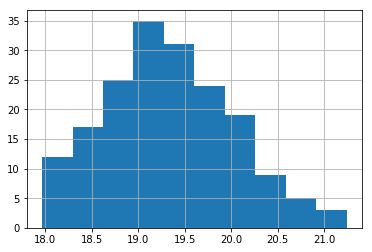

In [25]:
control_pre_by_dt.active_mins.hist()

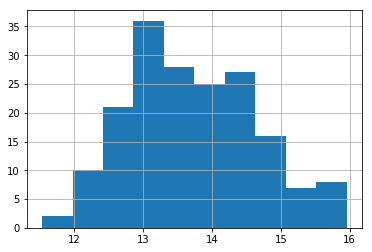

In [28]:
test_pre_by_dt.active_mins.hist()

In [31]:
x1_pre = control_pre_by_dt.active_mins.mean()
s1_pre = control_pre_by_dt.active_mins.std()
N1_pre = control_pre_by_dt.shape[0]

x2_pre = test_pre_by_dt.active_mins.mean()
s2_pre = test_pre_by_dt.active_mins.std()
N2_pre = test_pre_by_dt.shape[0]

# Assuming inequal variance between two groups
v_pre = N1_pre+N2_pre - 2

# Since v is large enough
t_q = 1.96
lower = round(x2_pre - x1_pre - t_q*sqrt(s1_pre**2/N1_pre + s2_pre**2/N2_pre),2)
upper = round(x2_pre - x1_pre + t_q*sqrt(s1_pre**2/N1_pre + s2_pre**2/N2_pre),2)
print("[" + str(lower) + ", "+str(upper)+"]")

[-5.78, -5.44]


In [32]:
s1_pre

0.6847158387685539

In [35]:
s2

3.057468029309844

In [36]:
lower = round(x2 - x1 -(x2_pre - x1_pre) - t_q*sqrt(s1**2/N1 + s2**2/N2),2)
upper = round(x2 - x1 - (x2_pre - x1_pre)+ t_q*sqrt(s1**2/N1 + s2**2/N2),2)
print("[" + str(lower) + ", "+str(upper)+"]")

[9.2, 10.2]


## Problem 4
<p>4.In real life, experiment results can be nuanced. We provide you now additionally table 4 (t4_user_attributes.csv), which might help you analyze the results better. You should think about the context of the experiment and hypothesize why the analysis above could be insufficient. Explore the data and share with us your insights!</p>
<p>1). Given the new tables, were there any issues in treatment assignment? Was the treatment effect different for different covariates?<br>
2). Based on the new findings, what is your conclusion and what product recommendations would you make to the team?</p>
<p>Summarize your findings in a brief write-up with up to 200 words, and include one or two plots that best represent your results. Submit a single PDF file, please.</p>

In [37]:
control_info = t4[t4.uid.isin(t_control_clean.uid)]
test_info = t4[t4.uid.isin(t_test_clean.uid)]

In [38]:
# No duplication between two groups
control_info.merge(test_info,on='uid')

,uid,gender_x,user_type_x,gender_y,user_type_y


In [39]:
control_info.gender.value_counts(normalize=True)

male       0.561283
female     0.286840
unknown    0.151877
Name: gender, dtype: float64

In [40]:
control_info.user_type.value_counts(normalize=True)

non_reader     0.733627
reader         0.178624
new_user       0.063407
contributor    0.024342
Name: user_type, dtype: float64

In [78]:
test_info.gender.value_counts(normalize=True)

male       0.557776
female     0.283666
unknown    0.158558
Name: gender, dtype: float64

In [79]:
test_info.user_type.value_counts(normalize=True)

non_reader     0.761620
reader         0.136838
new_user       0.087750
contributor    0.013792
Name: user_type, dtype: float64

In [80]:
t4.gender.value_counts(normalize=True)

male       0.55514
female     0.28954
unknown    0.15532
Name: gender, dtype: float64

In [81]:
t4.user_type.value_counts(normalize=True)

non_reader     0.72132
reader         0.16004
new_user       0.09776
contributor    0.02088
Name: user_type, dtype: float64

In [82]:
t4_nonreader = t4[t4.user_type=='non_reader']
t4_nonreader.gender.value_counts(normalize=True)

male       0.551128
female     0.290578
unknown    0.158293
Name: gender, dtype: float64

In [83]:
t_test_info = t_test_clean.merge(test_info,on='uid')
t_test_non_reader = t_test_info[t_test_info.user_type=='non_reader']
t_test_reader = t_test_info[t_test_info.user_type=='reader']
t_test_new = t_test_info[t_test_info.user_type=='new_user']
t_test_contr = t_test_info[t_test_info.user_type=='contributor']

In [84]:
t_test_non_reader.gender.value_counts(normalize=True)

male       0.606613
female     0.243458
unknown    0.149929
Name: gender, dtype: float64

In [85]:
print("Testing Group")
print("Non_reader: "+ str(t_test_non_reader.active_mins.mean()))
print("Reader: "+ str(t_test_reader.active_mins.mean()))
print("New_user: "+ str(t_test_new.active_mins.mean()))
print("Contributor: "+ str(t_test_contr.active_mins.mean()))

Testing Group
Non_reader: 10.432543741344508
Reader: 42.18685920828555
New_user: 9.25145945945946
Contributor: 88.38433111603844


In [ ]:
t_control_info = t_control_clean.merge(control_info,on='uid')
t_control_non_reader = t_control_info[t_control_info.user_type=='non_reader']
t_control_reader = t_control_info[t_control_info.user_type=='reader']
t_control_new = t_control_info[t_control_info.user_type=='new_user']
t_control_contr = t_control_info[t_control_info.user_type=='contributor']

In [ ]:
print("Control Group")
print("Non_reader: "+ str(t_control_non_reader.active_mins.mean()))
print("Reader: "+ str(t_control_reader.active_mins.mean()))
print("New_user: "+ str(t_control_new.active_mins.mean()))
print("Contributor: "+ str(t_control_contr.active_mins.mean()))

In [41]:
control_demo = control_info.groupby(['gender','user_type']).size().reset_index()
control_demo.columns = ['gender','user_type','count']

In [43]:
control_demo['group'] = control_demo['gender'] + '-' + control_demo['user_type']

Text(0.5, 1.0, 'Control Group Composition')

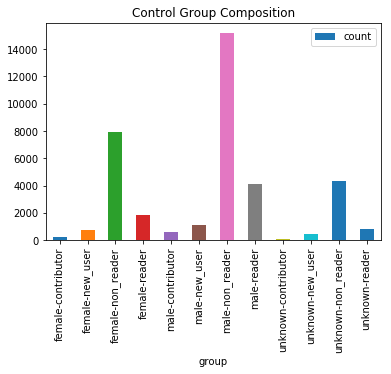

In [70]:
ax = control_demo.plot.bar(x='group',y='count')
ax.set_title("Control Group Composition")

Text(0.5, 1.0, 'Test Group Composition')

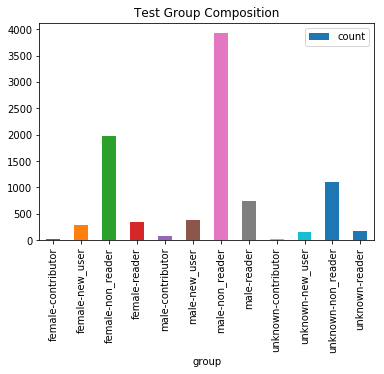

In [71]:
test_demo = test_info.groupby(['gender','user_type']).size().reset_index()
test_demo.columns = ['gender','user_type','count']
test_demo['group'] = test_demo['gender'] + '-' + test_demo['user_type']
ax = test_demo.plot.bar(x='group',y='count')
ax.set_title("Test Group Composition")

In [46]:
t_test_info = t_test_clean.merge(test_info,on='uid')
t_test_info.head()

,uid,variant_number,experiment_dt,signup_date,dt,active_mins,gender,user_type
0,40000,1,2019-02-06,2019-02-04,2019-02-13,3.0,male,new_user
1,40000,1,2019-02-06,2019-02-04,2019-03-02,18.0,male,new_user
2,40000,1,2019-02-06,2019-02-04,2019-03-12,4.0,male,new_user
3,40001,1,2019-02-06,2017-04-29,2019-02-14,16.0,male,non_reader
4,40001,1,2019-02-06,2017-04-29,2019-02-17,5.0,male,non_reader


In [62]:
t_test_by_demo = t_test_info.groupby(['dt','gender','user_type']).active_mins.mean().reset_index()
test_by_demo = t_test_by_demo.groupby(['gender','user_type']).agg({'active_mins':['mean','var'],'dt':'count'}).reset_index()
test_by_demo.columns = ['gender','user_type','mean_active_time','var_active_time','N']
test_by_demo.head()

,gender,user_type,mean_active_time,var_active_time,N
0,female,contributor,62.389147,997.348932,150
1,female,new_user,8.773184,17.179300,150
2,female,non_reader,10.074299,2.353357,150
3,female,reader,38.823113,89.076994,150
4,male,contributor,94.997857,715.526509,150


In [59]:
t_control_info = t_control_clean.merge(control_info,on='uid')
t_control_by_demo = t_control_info.groupby(['dt','gender','user_type']).active_mins.mean().reset_index()
control_by_demo = t_control_by_demo.groupby(['gender','user_type']).agg({'active_mins':['mean','var'],'dt':'count'}).reset_index()
control_by_demo.columns = ['gender','user_type','mean_active_time','var_active_time','N']
control_by_demo.head()

,gender,user_type,mean_active_time,var_active_time,N
0,female,contributor,52.193626,71.652422,150
1,female,new_user,5.286266,4.666500,150
2,female,non_reader,6.237998,0.470906,150
3,female,reader,26.810553,3.519258,150
4,male,contributor,69.710656,38.247828,150


In [63]:
demo_comp = test_by_demo.merge(control_by_demo,on=['gender','user_type'])

In [64]:
demo_comp.head()

,gender,user_type,mean_active_time_x,var_active_time_x,N_x,mean_active_time_y,var_active_time_y,N_y
0,female,contributor,62.389147,997.348932,150,52.193626,71.652422,150
1,female,new_user,8.773184,17.179300,150,5.286266,4.666500,150
2,female,non_reader,10.074299,2.353357,150,6.237998,0.470906,150
3,female,reader,38.823113,89.076994,150,26.810553,3.519258,150
4,male,contributor,94.997857,715.526509,150,69.710656,38.247828,150


In [65]:
demo_comp.columns = ['gender','user_type','test_mean_mins','test_var_mins','test_N','control_mean_mins','control_var_mins','control_N']
demo_comp.head()

,gender,user_type,test_mean_mins,test_var_mins,test_N,control_mean_mins,control_var_mins,control_N
0,female,contributor,62.389147,997.348932,150,52.193626,71.652422,150
1,female,new_user,8.773184,17.179300,150,5.286266,4.666500,150
2,female,non_reader,10.074299,2.353357,150,6.237998,0.470906,150
3,female,reader,38.823113,89.076994,150,26.810553,3.519258,150
4,male,contributor,94.997857,715.526509,150,69.710656,38.247828,150


In [68]:
demo_comp['CI_lower'] = demo_comp.test_mean_mins - demo_comp.control_mean_mins - t_q*np.sqrt(demo_comp.test_var_mins/demo_comp.test_N + demo_comp.control_var_mins/demo_comp.control_N)
demo_comp['CI_upper'] = demo_comp.test_mean_mins - demo_comp.control_mean_mins + t_q*np.sqrt(demo_comp.test_var_mins/demo_comp.test_N + demo_comp.control_var_mins/demo_comp.control_N)


,gender,user_type,test_mean_mins,test_var_mins,test_N,control_mean_mins,control_var_mins,control_N,CI_lower,CI_upper
0,female,contributor,62.389147,997.348932,150,52.193626,71.652422,150,4.963138,15.427905
1,female,new_user,8.773184,17.179300,150,5.286266,4.666500,150,2.738930,4.234906
2,female,non_reader,10.074299,2.353357,150,6.237998,0.470906,150,3.567356,4.105246
3,female,reader,38.823113,89.076994,150,26.810553,3.519258,150,10.472608,13.552511
4,male,contributor,94.997857,715.526509,150,69.710656,38.247828,150,20.893494,29.680908


In [72]:
demo_comp.to_csv("problem4.csv")